Homework 4: Sentiment Analysis - Task 2
----

Names 
----
Names: __Adrian Criollo__ (Write these in every notebook you submit.)

Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.

Learn more about Naive Bayes here: https://www.nltk.org/_modules/nltk/classify/naivebayes.html 

Naive Bayes classifiers use Bayes’ theorem for predictions. Naive Bayes can be a good baseline for NLP applications in particular. You can use it as a baseline for your project!

**

**10 points in Task 5 will be allocated for all 9 graphs (including the one generated here in Task 4 for Naive Bayes Classifier) being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents

In [5]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier
import pandas as pd

# some potentially helpful data structures from collections
from collections import defaultdict, Counter

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
#import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adriancriollo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

In [7]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tuples = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tuples = sutils.generate_tuples_from_file(DEV_FILE)
print(train_tuples[0][-5:])
print(dev_tuples[0][-5:])

[['I', 'myself', 'feel', 'this', 'film', 'is', 'a', 'rare', 'treasure', '.', 'Not', 'only', 'is', 'it', 'the', 'beginning', 'of', 'Shirley', 'Temple', "'s", 'career', ',', 'but', 'a', 'rare', 'look', 'on', 'how', 'our', 'society', 'has', 'changed', '.', 'You', 'have', 'to', 'understand', ',', 'certain', 'things', 'we', 'today', 'would', 'view', 'as', 'sexual', ',', 'back', 'then', 'would', 'be', 'considered', 'innocent', '.', 'For', 'example', ',', 'the', 'parents', 'of', 'the', 'children', 'in', 'the', 'film', 'as', 'well', 'as', 'the', 'many', 'parents', 'who', 'took', 'their', 'children', 'to', 'see', 'this', 'movie', ',', 'saw', 'this', 'as', 'just', 'children', 'mimicking', 'adults', '.', 'Most', 'people', 'did', "n't", 'think', 'of', 'anyone', 'viewing', 'children', 'sexually', 'attractive', ',', 'other', 'than', 'teenage', 'boys', 'lusting', 'over', 'teenage', 'girls', '.', 'To', 'them', 'it', 'was', "n't", 'sexual', '.', 'Mind', 'you', 'this', 'was', 'before', 'we', 'had', 'int

In [8]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and 
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value

# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference 
# between using binarized features and using counts (non binarized features)

def word_feats(words, binary=True) -> dict:
    results = {}
    if binary:
        for word in words:
            results[word] = True
    else:
        for word in words:
            results[word] = words.count(word)
    return results


# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled

df_train = pd.read_csv(TRAIN_FILE, header=None, sep='\t', names = ['ID', 'Review', 'Label'])
df_dev = pd.read_csv(DEV_FILE, header=None, sep='\t', names = ['ID', 'Review', 'Label'])

trained_data = []
for review, label in zip(df_train['Review'], df_train['Label']):
    words = review.split()
    trained_data.append((word_feats(words), label))

classifier = nltk.NaiveBayesClassifier.train(trained_data)

# test to make sure that you can train the classifier and use it to classify a new example

test_review = df_dev['Review'].iloc[0].split()
test_label = df_dev['Label'].iloc[0]
prediction = classifier.classify(word_feats(test_review))
print(f"Test label: {test_label}")
print(f"Predicted label: {prediction}")


Test label: 0
Predicted label: 0


Training data percentage: 10%
Precision: 0.6999, Recall: 0.5657, F1 Score: 0.4658, Accuracy: 0.5450

Training data percentage: 20%
Precision: 0.7300, Recall: 0.6271, F1 Score: 0.5685, Accuracy: 0.6100

Training data percentage: 30%
Precision: 0.7333, Recall: 0.6822, F1 Score: 0.6548, Accuracy: 0.6700

Training data percentage: 40%
Precision: 0.7819, Recall: 0.7536, F1 Score: 0.7403, Accuracy: 0.7450

Training data percentage: 50%
Precision: 0.8021, Recall: 0.7907, F1 Score: 0.7838, Accuracy: 0.7850

Training data percentage: 60%
Precision: 0.8047, Recall: 0.8030, F1 Score: 0.7999, Accuracy: 0.8000

Training data percentage: 70%
Precision: 0.8003, Recall: 0.8010, F1 Score: 0.7999, Accuracy: 0.8000

Training data percentage: 80%
Precision: 0.8165, Recall: 0.8168, F1 Score: 0.8150, Accuracy: 0.8150

Training data percentage: 90%
Precision: 0.7920, Recall: 0.7920, F1 Score: 0.7900, Accuracy: 0.7900

Training data percentage: 100%
Precision: 0.7976, Recall: 0.7972, F1 Score: 0.7950, Accurac

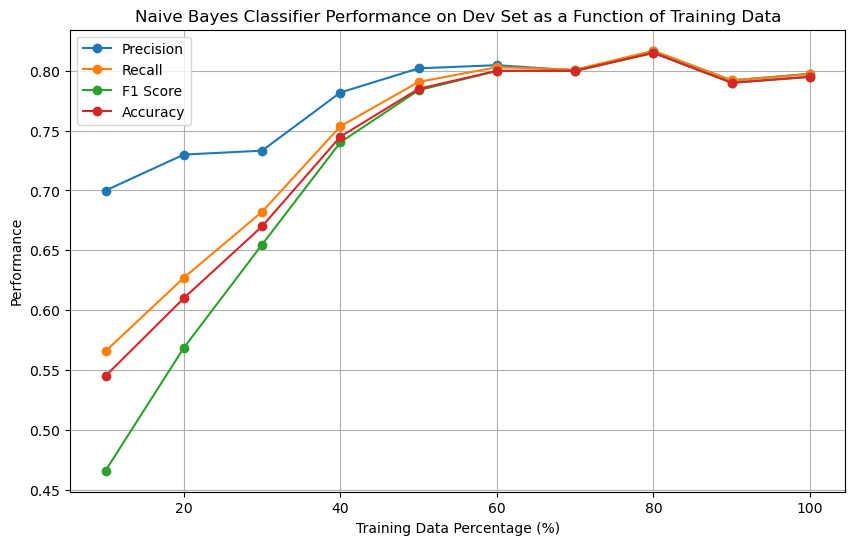

F1 score binarized: 0.7949948748718718
F1 score multinomial: 0.7896634615384615


In [9]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)



# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

dev_feats = []
for review, label in zip(df_dev['Review'], df_dev['Label']):
    words = review.split()
    features = word_feats(words)
    dev_feats.append((features, label))
    
sutils.create_training_graph(sutils.naives_bayes_helper, trained_data, dev_feats, kind="Naive Bayes", savepath="naive_bayes_graph3.png", verbose=True)

def evaluate_model(binary=True):
    train_feats = []
    for review, label in zip(df_train['Review'], df_train['Label']):
        words = review.split()
        features = word_feats(words, binary=binary)
        train_feats.append((features, label))

    dev_feats = []
    for review, label in zip(df_dev['Review'], df_dev['Label']):
        words = review.split()
        features = word_feats(words, binary=binary)
        dev_feats.append((features, label))

    precision_score, recall_score, f1_score, accuracy_score = sutils.naives_bayes_helper(train_feats, dev_feats)

    return f1_score

f1_binarized = evaluate_model(binary=True)
f1_multinomial = evaluate_model(binary=False)

print(f"F1 score binarized: {f1_binarized}")
print(f"F1 score multinomial: {f1_multinomial}")

Test your model using both a __binarized__ (bag of words representation where we put 1 [true] if the word is there and 0 [false] otherwise) and a __multinomial__ (bag of words representation where we put the count of the word if the word occurs, and 0 otherwise). Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

- f1 score binarized: __.79__
- f1 score multinomial: __.78__